# Data Analysis of S&P 500 to be Used on Food Cost Trend Data
## By Sydney Balboni 

### Description


The data analysis in this notebook is temporarily performed on S&P 500 data from 2022-2023 in place of the food cost trend data we are hoping to get ahold of from the Food and Agriculture Association of the United Nations. 

Our plan is to perform predictions on the difference between the trend and the real trend (the residuals) in order to predict future deviations of the real trend from the predicted trend. 

### Imports

In [56]:
import pandas as pd # for handling the data
import matplotlib.pyplot as plt # for plotting
import numpy as np # for handling numbers

### Loading Data
The S&P 500 data is loaded from CSVs into separate data frames. The data is then concatenated into a single data frames in the correct chronological order. 

In [57]:
data_food_price_index = pd.read_csv('../data/FAO_Monthly_Real_Food_Price_Indices.csv')
data_food_price_index.head()

,Year,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index
0,1990,1990-01,77.6,88.8,64.7,77.6,54.0,106.3
1,1990,1990-02,78.0,91.9,63.2,75.3,53.9,109.7
2,1990,1990-03,77.2,94.2,50.1,74.1,55.4,115.0
3,1990,1990-04,79.6,97.4,58.6,76.0,53.3,114.1
4,1990,1990-05,77.9,98.0,47.4,75.0,55.1,109.3


The values in the data frame are objects. These values need to be casted into floats in order to plot and perform numerical operations on them. To do this, the commas in the numbers need to be removed before casting. 

The dates in the data frame are casted into datetime objects to make plotting easier.

In [58]:
# Convert Date coloumn to datetime
data_food_price_index['Date'] = pd.to_datetime(data_food_price_index['Date'])

### Data Analysis

Using Matplotlib, a line plot is made from the data for each of the dates in the data frame.

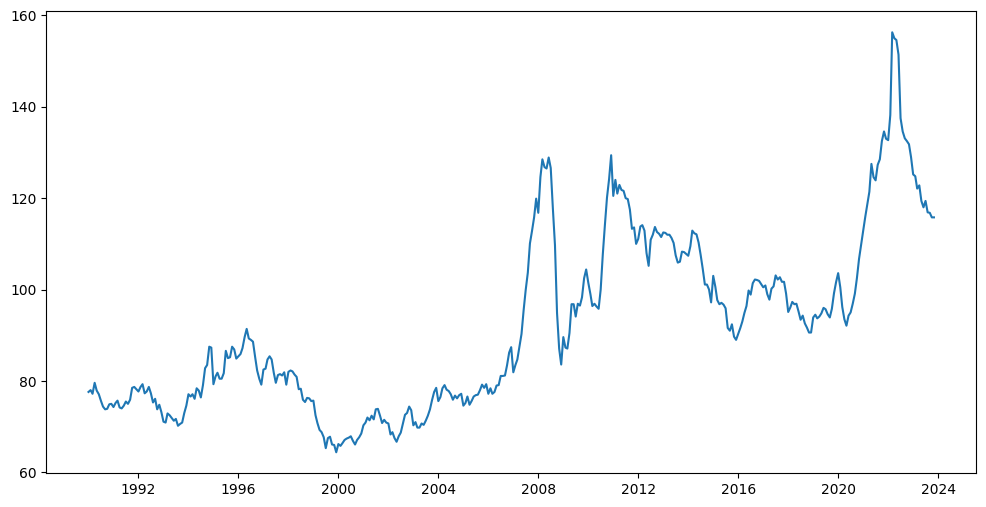

In [61]:
# Make a line plot of the 'Close' column against the date column 
plt.plot(data_food_price_index['Date'], data_food_price_index['Food Price Index'], label='Food Price Index')
plt.rcParams["figure.figsize"] = (12,6)
plt.show()

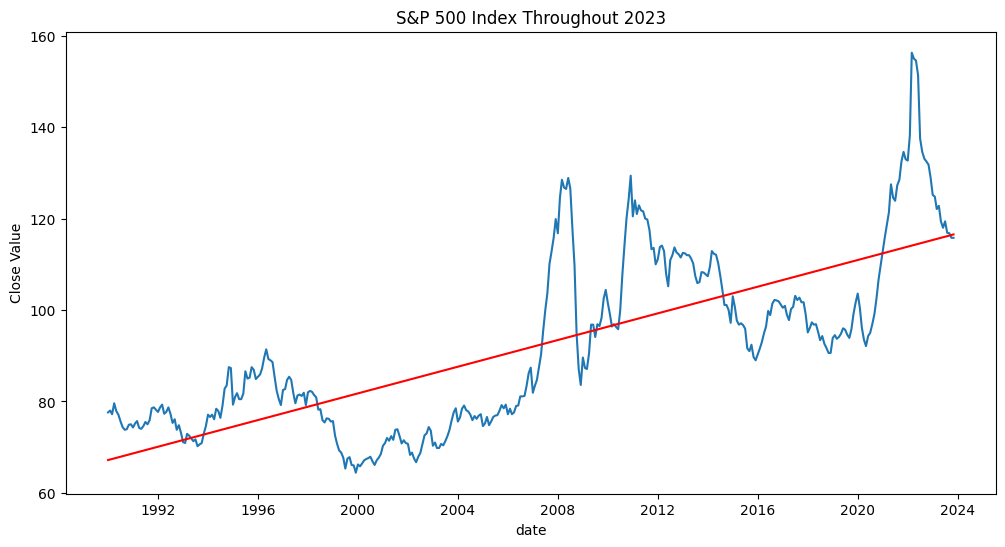

In [63]:
# Make a line plot of the 'Close' column against the date column with a trendline
days = (data_food_price_index['Date'] - data_food_price_index['Date'].min()).dt.days
slope, intercept = np.polyfit(days, data_food_price_index['Food Price Index'], 1)
trend_line = slope * days + intercept
plt.plot(data_food_price_index['Date'], data_food_price_index['Food Price Index'], label='Food Price Index')
plt.plot(data_food_price_index['Date'], trend_line, label='Trend Line', color='red')
plt.xlabel('date')
plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Close Value')
plt.title('S&P 500 Index Throughout 2023')
plt.show()

In [64]:
# Calculate the MAE of the trendline
mae = np.mean(np.abs(data_food_price_index['Food Price Index'] - trend_line))
print('The MAE of the trendline is:', mae)

The MAE of the trendline is: 10.571621642177236


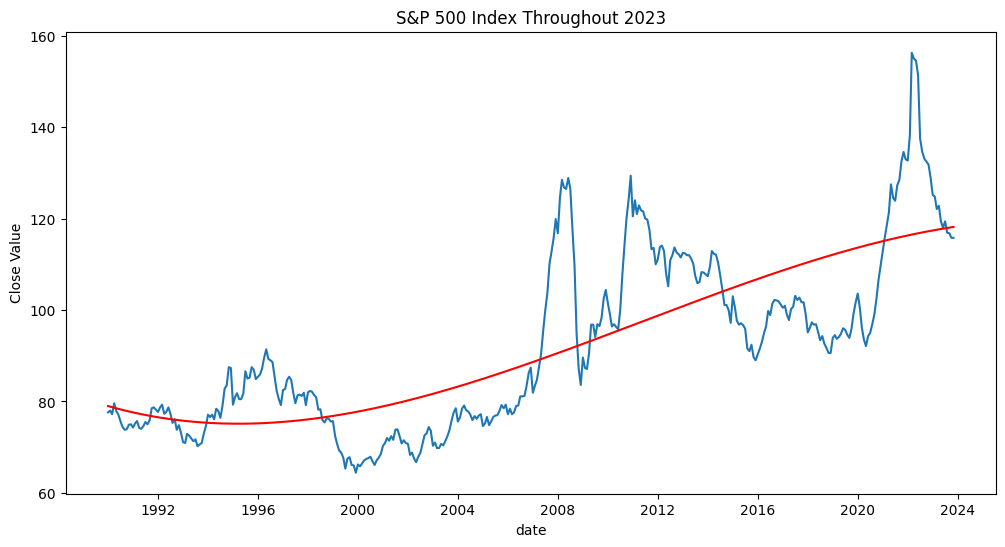

In [75]:
# Make a line plot of the 'Close' column against the date column with a trendline
days = (data_food_price_index['Date'] - data_food_price_index['Date'].min()).dt.days
slope0, slope1, slope2,  intercept = np.polyfit(days, data_food_price_index['Food Price Index'], 3)
trend_line = slope0 * days**3 + slope1 * days**2 + slope2 * days + intercept
plt.plot(data_food_price_index['Date'], data_food_price_index['Food Price Index'], label='Food Price Index')
plt.plot(data_food_price_index['Date'], trend_line, label='Trend Line', color='red')
plt.xlabel('date')
plt.rcParams["figure.figsize"] = (12,6)
plt.ylabel('Close Value')
plt.title('S&P 500 Index Throughout 2023')
plt.show()


In [76]:
# Calculate the MAE of the trendline
mae = np.mean(np.abs(data_food_price_index['Food Price Index'] - trend_line))
print('The MAE of the trendline is:', mae)

The MAE of the trendline is: 9.665894316835168


In [79]:
# Save the value of the trendline at each data point in a new column
data_food_price_index['Trend'] = trend_line

# Calculate the residuals by subtracting the trendline from the close value
data_food_price_index['Residuals'] = data_food_price_index['Food Price Index'] - data_food_price_index['Trend']

data_food_price_index.head()


,Year,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Trend,Residuals
0,1990,1990-01-01,77.6,88.8,64.7,77.6,54.0,106.3,78.982883,-1.382883
1,1990,1990-02-01,78.0,91.9,63.2,75.3,53.9,109.7,78.852301,-0.852301
2,1990,1990-03-01,77.2,94.2,50.1,74.1,55.4,115.0,78.736450,-1.536450
3,1990,1990-04-01,79.6,97.4,58.6,76.0,53.3,114.1,78.610495,0.989505
4,1990,1990-05-01,77.9,98.0,47.4,75.0,55.1,109.3,78.490904,-0.590904


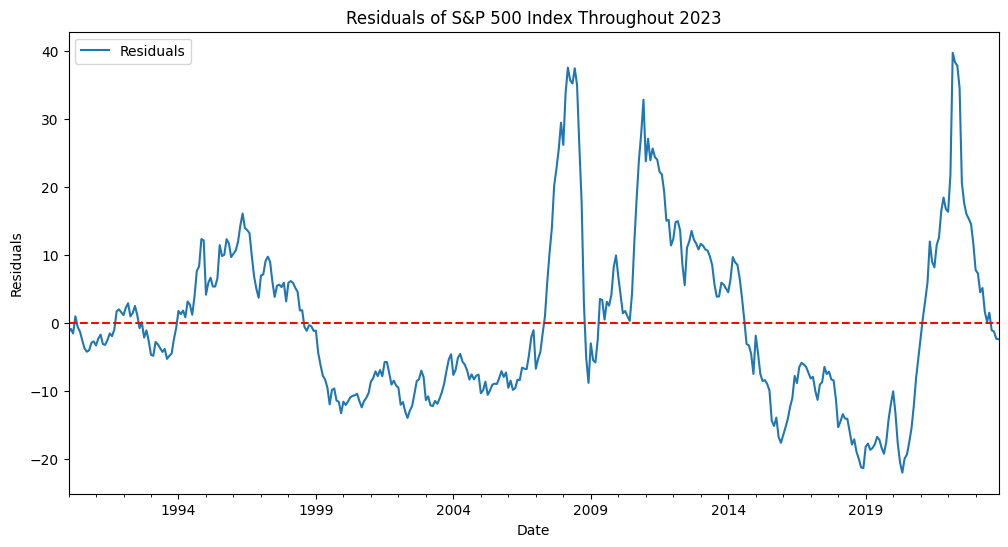

In [80]:
# Plot the residuals against the date column
data_food_price_index.plot(x='Date', y='Residuals', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of S&P 500 Index Throughout 2023')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
